# MNIST_Tf implimentation
### This images contains handwritten digits from 0->9
### NN has to classify handwritten handWritten digit_images into their respective digits from 0->9 

In [355]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution
import numpy as np
import matplotlib.pyplot as plt

## Loading MNIST datasets

In [356]:
# Load the MNIST dataset from tensorflow_keras
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.mnist.load_data() #Same functionality as below, below shows how its saved
## It would give tupple => ([X_train,Y_train],[X_test,Y_test]) , firstIndex have list for training and second has a list for testing 
mnist = tf.keras.datasets.mnist.load_data()  
X_train = mnist[0][0] #Would give X_train 
Y_train = mnist[0][1] #Would give X_train
X_test = mnist[1][0] #Would give X_train
Y_test = mnist[1][1] #Would give X_train


In [357]:
# Above dataset is like this
tupple = ([11,23],[34,45])
print(type(tupple))
tupple[0][1]

<class 'tuple'>


23

In [358]:
# Total 70,000 MNIST handwritten images
# (28,28) means 28 width size and 28 height size, total pixels are 784
print(X_train.shape) #X are the matrix of size 28x28, having pixel values in them
print(X_test.shape)
print()
# Y refers to the image labels, means which digit is written in the image
print(Y_train.shape)
print(Y_test.shape)
print(Y_test)

(60000, 28, 28)
(10000, 28, 28)

(60000,)
(10000,)
[7 2 1 ... 4 5 6]


## OneHot endcoding for Y labels, for multiclass classification

In [359]:
#Y_labels are integers values, it has to be converted into oneHot endcoding, to be get recognised from the neuron
#And integer lables have be oneHotEncoded while training
Y_train = tf.keras.utils.to_categorical(Y_train , num_classes=10) #OneHot Encoded to 10 classes 
Y_test = tf.keras.utils.to_categorical(Y_test , num_classes=10) #Same with testingLabels
Y_train.shape 

(60000, 10)

## Displaying the images

(28, 28)


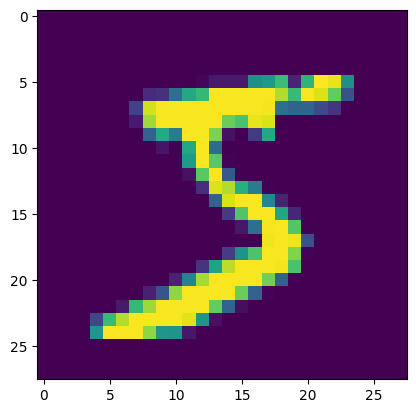

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [360]:
# If the images are already flattend means, all pixels_value converted in a 1D-list, then we have to reshped into equal row and column or original row and col, bcz image can only be plotted when they were not flattend
# To plot image, row and columns should be known  
# But here already they are row and col, so no reshape, if not so, then we had to use .reshape((28,28)), after every image, as parent row,col here is 28,28
first_image = X_train[0] #Plotting firstImage
print(first_image.shape)
plt.imshow(first_image) #Building use matplotlib.pyplot
plt.show()
Y_train[0] #Label representing 5 (starting from 0)

In [361]:
# Reshaping images's size from 2D shape to 1D -> flattening
# Current shape of images (no. of images, image.size(28,28))
# So passes image parameter, then told that no. of images remain as it is
# Then '-1' shows that convert remaing 2D to 1D, compenstae the remaining size by multiplying with other,
# 28x28 = 784
X_train = np.reshape(X_train, (X_train.shape[0], -1))
print(X_train.shape)

X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_test.shape)

# # Initialize TensorFlow session
# with tf.compat.v1.Session() as sess:
#     # Evaluate the tensor within the session to get its value as a numpy array
#     X_train_np = sess.run(X_train)
#     X_test_np = sess.run(X_test)
#     print(X_train_np.shape)

(60000, 784)
(10000, 784)


## Building the NN
### All parameters(W,B) would be variables, not placeHolders(As user willnot provide value) and constant

In [362]:
# Creating a array having randomly selected number from normal distribution, 
# -would use for putting random values in weights 
tf.compat.v1.disable_eager_execution()
sess = tf.compat.v1.Session()
print(sess.run(tf.compat.v1.random_normal([1,2]))) #Inside sqBracs required shape, can take shape of any kind
# Hence here is no processing of elements with each other is there, so no session req

[[0.6604403 0.996176 ]]


In [363]:
# Intilialising no. of units in each layer
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_output = 10

# Initialsing weightsDictionary, in which key is layer, and value will be array of the weights of that layer 
weights = {
    'h1':tf.Variable(tf.compat.v1.random_normal([n_input,n_hidden_1])), #Hence got 2D list with 784_rows(input_neuron) and 256_cols(H1_Neuron) 
    'h2':tf.Variable(tf.compat.v1.random_normal([n_hidden_1,n_hidden_2])), #265x256
    'out':tf.Variable(tf.compat.v1.random_normal([n_hidden_2,n_output])) #256x10
}

# Initialsing BiasesDictionary, in which key is layer, and value will be array of the biases for that layer 
biases = {
    'h1':tf.Variable(tf.compat.v1.random_normal([n_hidden_1])), #1D list having 1x256 parameter of biases
    'h2':tf.Variable(tf.compat.v1.random_normal([n_hidden_2])), # 1x256
    'out':tf.Variable(tf.compat.v1.random_normal([n_output])) # 1x10
}


## Forward Propagation

In [364]:
tf.nn.relu # Relu-Function

<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>

In [365]:
def forwardPropagation(X , weight , biases):
    Input_h1 = tf.matmul(X , weights['h1']) + biases['h1']
    Output_h1 = tf.nn.relu(Input_h1)
    
    Input_h2 = tf.matmul(Output_h1 , weights['h2']) + biases['h2']
    Output_h2 = tf.nn.relu(Input_h2)
    
    Input_out = tf.matmul(Output_h2, weights['out']) + biases['out']
    return Input_out # Output has no actication function
    

In [366]:
Y_train.shape

(60000, 10)

### Running Fp

In [367]:
# Applying placeholders in X and Y, so that we could change from training to testing when we want
# Both train and test, no. images(rows) are different but columns(Flattend_size) is same
sess = tf.compat.v1.Session()
# sess.run(tf.compat.v1.global_variables_initializer()) #In case of variable intilisation , have to call this command, which makes above variables as global
X = tf.compat.v1.placeholder(tf.float32,[None,784]) # None means, any number could come
Y = tf.compat.v1.placeholder(tf.float32,[None, 10])

pred = forwardPropagation(X , weights, biases)
sess.run(tf.compat.v1.global_variables_initializer()) #In case of variable intilisation , have to call this command, which makes above variables as global

#Hence output would be a Matrix same as Y_true of size 10, so we have to find that index having maxValue at each row, means vertically, 
# - so axis would be 1
prediction = tf.argmax(pred, axis=1)
true_labels = tf.argmax(Y, axis=1)

#Accuracy
correct_predictions = tf.equal(prediction , true_labels) #Will return boolean list, if same true es=lse false
print(X,Y)

Tensor("Placeholder_142:0", shape=(None, 784), dtype=float32) Tensor("Placeholder_143:0", shape=(None, 10), dtype=float32)


### Prediction and performance

In [407]:
#Now running the session to execute the implimentation/process
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer()) #In case of variable intilisation , have to call this command, which makes above variables as global

prediction_evaluated , labels , correctness= sess.run([prediction,true_labels,correct_predictions], feed_dict={X: X_train, Y: Y_train})
print(prediction_evaluated.shape)
print(prediction_evaluated)
print(labels.shape)
print(labels)
print(correctness)

# Check how many correct 
f"The correct matches are :{correctness.sum()}" #Would sum the items in list, as True represent = 1 and false = 0

(60000,)
[2 2 2 ... 2 2 2]
(60000,)
[5 0 4 ... 5 6 8]
[False False False ... False False False]


'The correct matches are :6574'

## Backward Propagation

### Defining the cross_entropy loss cost function

In [410]:
# Found the mean off the costFunction as its was containg the 10K or 60K losses
# TO reduce this to one, founded the mean of all 
cost_withOut_Mean = tf.nn.softmax_cross_entropy_with_logits(logits=pred , labels = Y) # Would give list/tuple of 10k or 60k losses, losses of each datapoints 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred , labels = Y)) # Would find the mean of all loses 
cost_value , not_meaned_cost = sess.run([cost,cost_withOut_Mean], feed_dict={X: X_train, Y: Y_train})
print(cost_value)
print(not_meaned_cost)
type(not_meaned_cost.shape)

437909.97
[629709.44 748496.1  745062.4  ... 593984.56  21177.   519320.62]


tuple

### Intilalising the AdamOptimizer, which gonna minimize the cost from gradientDescnt tehcnique

In [411]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)
sess.run(tf.compat.v1.global_variables_initializer()) #In case of variable intilisation , have to call this command, which makes above variables as global
# Above required for Optmizer, as its a variable

### Now running the optimizer, for whole datapoints then after changing the weights and biases

In [414]:
# Itertavily change call the optimzer which would find the global minima and minimize the cost
for i in range(100):
    c,_=sess.run([cost,optimize], feed_dict={X:X_train , Y:Y_train}) #Processing the optimizer with cost
print(c)

In [417]:
prediction_evaluated , labels , correctness= sess.run([prediction,true_labels,correct_predictions], feed_dict={X: X_train, Y: Y_train})
print(prediction_evaluated.shape)
print(prediction_evaluated)
print(labels.shape)
print(labels)
print(correctness)
print("Correct :",np.sum(correctness))
print("Missed :",X_train.shape[0]-np.sum(correctness))

(60000,)
[5 0 4 ... 5 6 8]
(60000,)
[5 0 4 ... 5 6 8]
[ True  True  True ...  True  True  True]
Correct : 60000
Missed : 0


### Now running the optimizer for small batches first then changing the weights

In [ ]:
# Itertavily change call the optimzer which would find the global minima and minimize the cost 
# And change the parameters after every batch of datapoints
batch_size = 100
# Total bacthes would be 60,000/100=600, so the optimizer would run over the batch
for i in range(25):
    num_batches = X_train.shape[0]//batch_size
    c,_=sess.run([cost,optimize], feed_dict={X:X_train , Y:Y_train}) #Processing the optimizer with cost
print(c)